# Intro

# Libraries

In [36]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

# Path

In [26]:
path_in = '01_Input/'
path_out = '02_Output/'
os.listdir(path_out)

['Logfile_Output.log', 'Timeseries_Output.csv']

# Load Data

Timeseries Data:

In [22]:
df_data = pd.read_csv(path_out+'Timeseries_Output.csv', index_col=0)

In [35]:
df_data.head()

,Gas_Price,Power_Price,BHKW_Bin,BHKW_Gas,BHKW_Power,BHKW_Heat
0,16,21,0.0,0.0,0.0,0.0
1,16,21,0.0,0.0,0.0,0.0
2,16,20,0.0,0.0,0.0,0.0
3,16,22,0.0,0.0,0.0,0.0
4,16,20,0.0,0.0,0.0,0.0


Read Objective Function Value From Logfile:

In [68]:
def extract_obj_func_value(lines):
    for line in lines:
        if 'Objective value:' in line:
            obj = float(re.findall(r"[-+]?(?:\d*\.*\d+)", line)[0])
    return obj

In [76]:
infile = path_out+'Logfile_Output.log'
with open(infile) as f:
    lines = f.readlines()
    obj_solver = extract_obj_func_value(lines)

# Check Objective Function Value

In [73]:
costs = (df_data['BHKW_Gas']*df_data['Gas_Price']).sum()
reves = (df_data['BHKW_Power']*df_data['Power_Price']).sum()

obj_analysis = costs-reves

In [75]:
print('Obj Solver:', obj_solver)
print('Obj Analysis:', obj_analysis)
print('Obj Diff:', obj_solver-obj_analysis)

Obj Solver: -115.2
Obj Analysis: -115.20000000000005
Obj Diff: 4.263256414560601e-14


# EDA

In [33]:
def plot_timeseries(df_data, name, measure='MW'):
    """ plot single timeseries """
    y = df_data[name]
    x = df_data.index
    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)
    ax.plot(x, y, drawstyle='steps-post',
            linewidth=1.2,
            label=name)
    plt.title(name, loc='left')
    plt.xlabel('hour')
    plt.ylabel(measure)
    plt.grid()

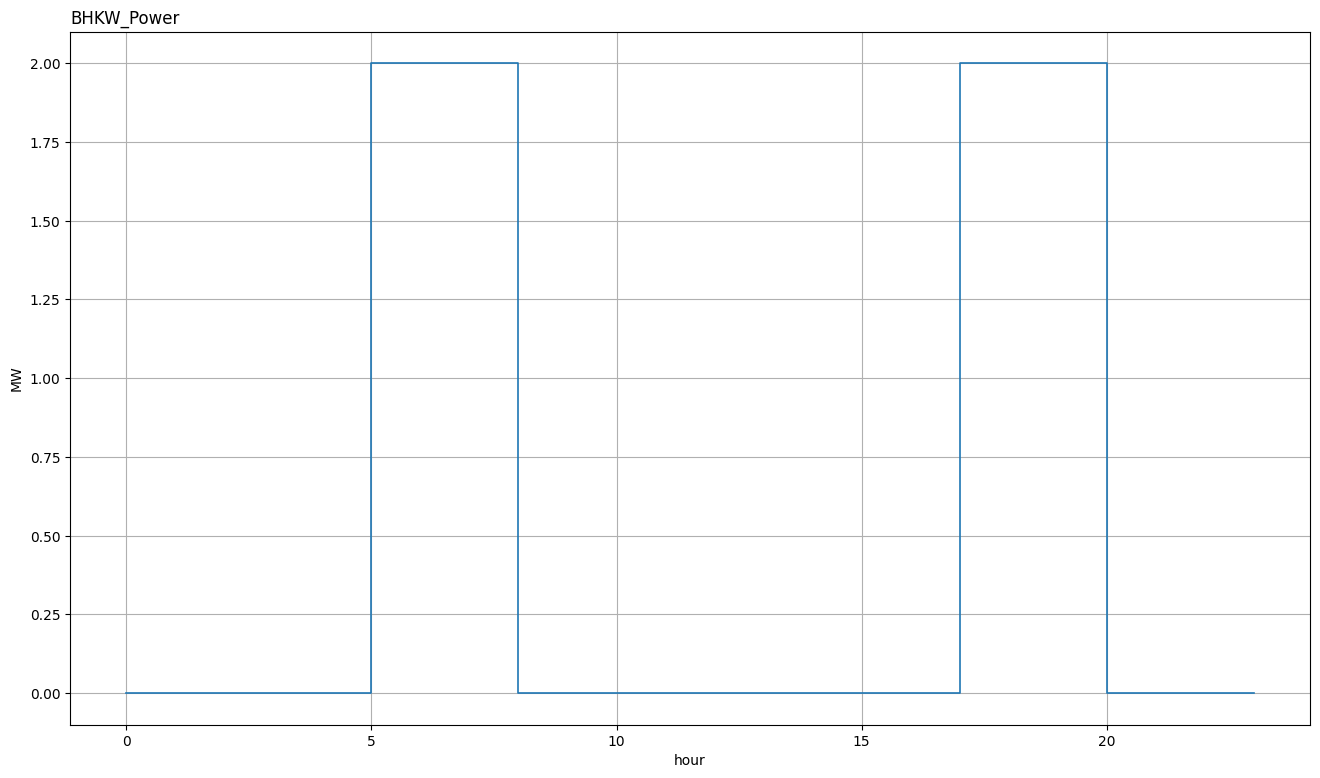

In [34]:
plot_timeseries(df_data, 'BHKW_Power')